# GitHub analysis client
This first version runs the analysis and takes for granted that pulsar already has the information it needs to do this.

In [9]:
import matplotlib.pyplot as plt
import operator
import pulsar

client = pulsar.Client('pulsar://localhost:6650')

In [3]:
# Assumes it will receive messages ordered and in tuple format
def get_top_values(topic, num_values):
    
    consumer = client.subscribe(
                  topic=topic,
                  subscription_name=topic+'_sub')
    
    result_dict = {}
    for i in range(num_values):
        msg = consumer.receive()
        try:
            # Save the string message (decode from byte value)
            message = str(msg.value().decode())
            # Acknowledge that the message was received
            consumer.acknowledge(msg)
            # Evaluate the string (should have tuple format) and add to dict
            result_dict.update(dict([eval(message)]))
        except:
            consumer.negative_acknowledge(msg)
    
    return result_dict

## Test data and function before Pulsar implementation

In [6]:
# Instead of a topic to connect to, receives a list that already has the values
def get_top_values_test(test_list, num_values): 
    result_dict = {}
    for i in range(num_values):
        result_dict.update(dict([test_list[i]]))
    return result_dict

In [7]:
# test list for top languages
top_languages_list = [('JavaScript', 414558), ('Java', 177839), ('Python', 267520), ('CSS', 57083), 
                ('PHP', 50818), ('Ruby', 22368), ('C++', 76267), ('C', 42708), ('Shell', 35257), 
                ('C#', 66798), ('Objective-C', 2120), ('R', 26508), ('VimL', 3812), ('Go', 24685), 
                ('Perl', 2498), ('CoffeeScript', 375), ('TeX', 5473), ('Swift', 14564), ('Scala', 3240), 
                ('Emacs Lisp', 35), ('Haskell', 2009), ('Lua', 5163), ('Clojure', 1278), ('Matlab', 11335), 
                ('Makefile', 7215), ('Groovy', 894), ('Puppet', 182), ('Rust', 11433), ('PowerShell', 4959)]

# 1. Top programming languages based on the number of projects developed

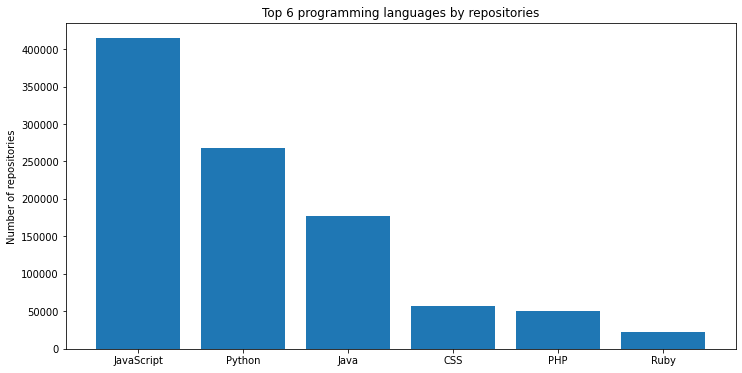

In [26]:
top_num = 6

q1_dict = get_top_values_test(top_languages_list, top_num)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.set_ylabel('Number of repositories')
ax.set_title(f'Top {top_num} programming languages by repositories')

top_languages = dict(sorted(q1_dict.items(), key=operator.itemgetter(1), reverse=True)[:10])
x_axis = list(top_languages.keys())
y_axis = list(top_languages.values())
plt.bar(range(len(top_languages)), y_axis, tick_label=x_axis)
plt.show()

# 2. Repositories with most commits

# 3. Top languages with testdriven approach

# 4. Top languages with testdriven approach and continous integration